In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
strikes = pd.read_csv("strikes_2000_2019.csv")

In [22]:
# Make a smaller data frame to focus on the strike time and place
strike_times = strikes[['INDX_NR','INCIDENT_DATE ','STATE',
                        'AIRPORT_ID', 'OPERATOR_ID','SPECIES_ID',
                        'DAMAGE','COST_REPAIRS',
                        'INCIDENT_MONTH','INCIDENT_YEAR',
                        'TIME_OF_DAY','TIME',
                        'FAAREGION','ENROUTE','LOCATION',
                        'HEIGHT','SPEED','DISTANCE',
                        'PHASE_OF_FLIGHT',
                        'EFFECT_NONE', 'EFFECT_ABORTED', 
                        'EFFECT_PREC_LAND', 'EFFECT_ENG_SHUT', 
                        'EFFECT_OTH', 'EFFECT_OTHER',
                        'SKY', 'PRECIP_FOG', 'PRECIP_RAIN', 
                        'PRECIP_SNOW', 'PRECIP_NONE', 
                        'BIRDS_SEEN', 'BIRDS_STRUCK', 'SIZE', 
                        'WARNED', 'REMARKS', 'AOS',
                        'OTHER_COST', 'COST_REPAIRS_INFL_ADJ', 
                        'COST_OTHER_INFL_ADJ','COMMENT',
                        'INDICATED_DAMAGE']]

In [23]:
#strike_times['INCIDENT_DATE '] = pd.to_datetime(strike_times['INCIDENT_DATE '])
strike_times = strike_times.replace('     ', np.nan)
strike_times['TIME'] = pd.to_datetime(strike_times['TIME'], 
                                      format= '%H:%M')

In [24]:
#restrict our data frame to month, time, entries only
month_day_data= strike_times[['INCIDENT_MONTH','TIME']]

In [25]:
month_day_data.head(50)

,INCIDENT_MONTH,TIME
0,5,1900-01-01 08:35:00
1,5,1900-01-01 19:30:00
2,8,NaT
3,3,NaT
4,5,1900-01-01 11:25:00
5,3,1900-01-01 18:40:00
6,8,NaT
7,10,NaT
8,6,NaT
9,4,NaT


In [26]:
#get the hour value from the Time category
month_day_data['TIME']= month_day_data['TIME'].dt.hour

c:\python3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
month_day_data.head(15)

,INCIDENT_MONTH,TIME
0,5,8.0
1,5,19.0
2,8,NaN
3,3,NaN
4,5,11.0
5,3,18.0
6,8,NaN
7,10,NaN
8,6,NaN
9,4,NaN


In [28]:
#For each month the following data shows a pivot table with each month, hour and frequency of strikes

month_day_data.groupby(['INCIDENT_MONTH', 'TIME']).size().unstack()

TIME,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
INCIDENT_MONTH,,,,,,,,,,,,,,,,,,,,,
1,29,21,14,18,26,34,101,199,219,252,...,187,212,250,305,220,140,122,78,65,58
2,36,29,15,13,23,38,139,191,220,214,...,169,183,177,198,232,167,138,119,95,64
3,112,63,45,44,52,82,151,265,307,294,...,240,240,219,257,250,273,320,333,246,235
4,264,135,75,71,96,128,246,376,414,456,...,345,327,351,320,302,240,428,661,653,588
5,433,183,117,107,169,165,379,560,544,625,...,418,417,462,454,441,390,402,781,933,912
6,93,71,34,50,70,134,482,761,740,671,...,420,436,445,515,541,541,358,281,296,227
7,176,98,85,72,104,209,796,1294,1349,1204,...,484,557,649,714,792,835,583,459,418,333
8,256,198,152,99,140,232,715,1173,1260,1240,...,574,613,637,775,842,798,715,725,609,579
9,458,243,160,164,199,278,476,868,1010,1061,...,477,491,595,647,705,666,1058,1166,1047,960


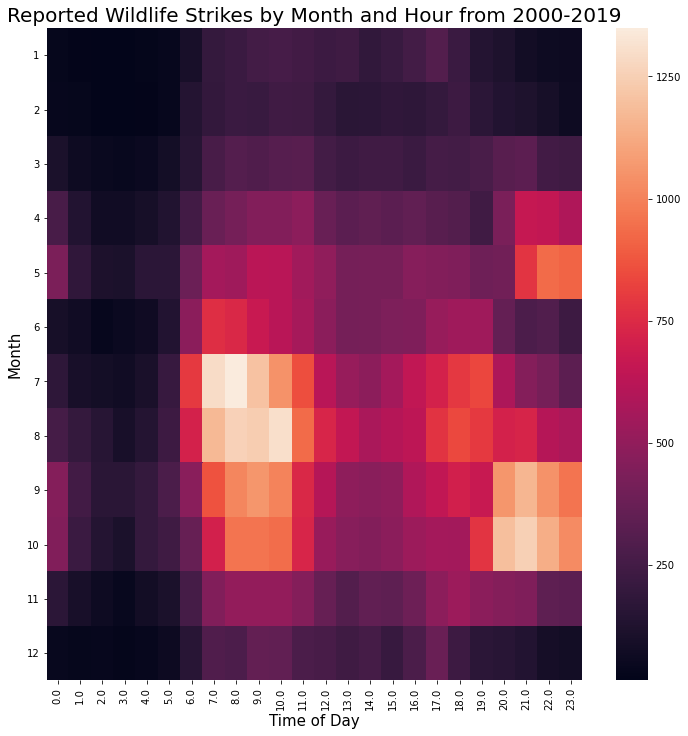

In [30]:
#plot the heatmap

fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(month_day_data.groupby(['TIME','INCIDENT_MONTH']).size().unstack().T, yticklabels=1)

ax.set_title("Reported Wildlife Strikes by Month and Hour from 2000-2019", size=20)

for item in ax.get_yticklabels():
    item.set_rotation(0)
    
for item in ax.get_xticklabels():
    item.set_rotation(90)

plt.xlabel('Time of Day', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Month', fontsize = 15)    
plt.savefig('heatmap')
plt.show()